In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("http://51.91.120.89/extras/gapminderDataFiveYear.csv")
df = df.query(" year==2007 ")
df

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


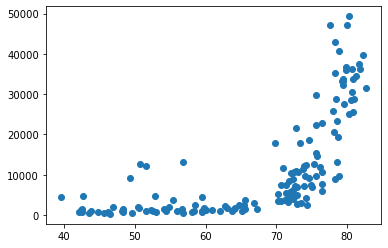

In [4]:
plt.scatter(df.lifeExp, df.gdpPercap)

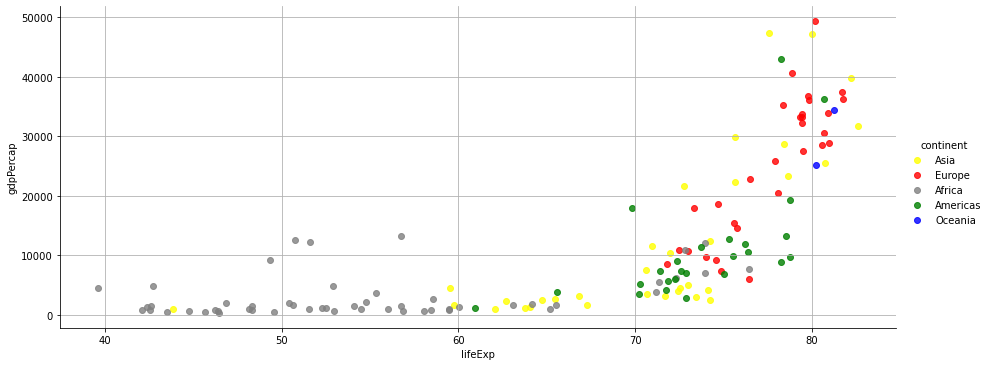

In [16]:
colors = ['yellow','red','gray','green','blue']
sns.lmplot(data=df, x="lifeExp", y="gdpPercap", aspect=2.5, fit_reg=False, hue="continent", palette=colors)
plt.grid()

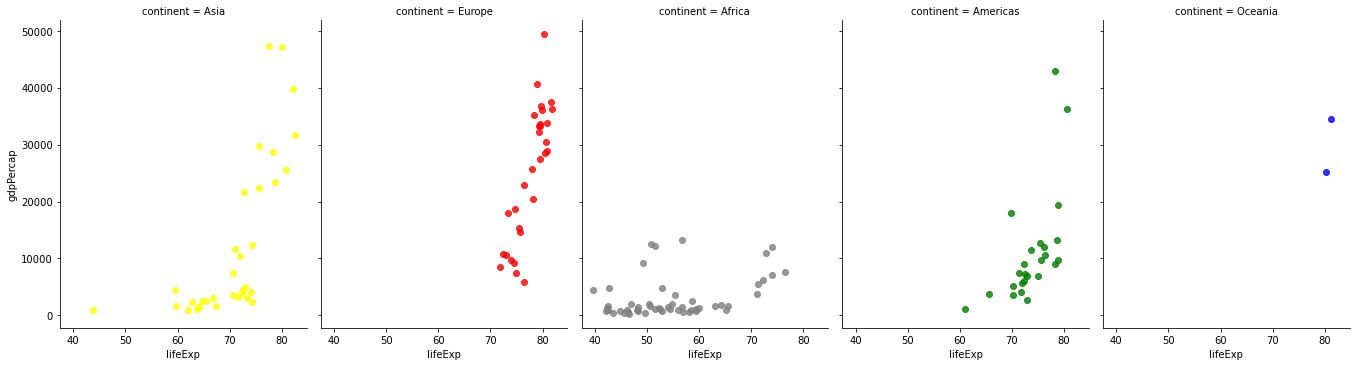

In [18]:
colors = ['yellow','red','gray','green','blue']
sns.lmplot(data=df, x="lifeExp", y="gdpPercap", aspect=0.75, 
           fit_reg=False, hue="continent", palette=colors, col='continent')
plt.show()

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


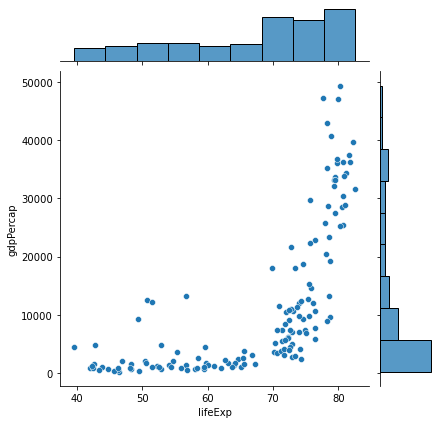

In [19]:
sns.jointplot(df.lifeExp, df.gdpPercap, kind="scatter")

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


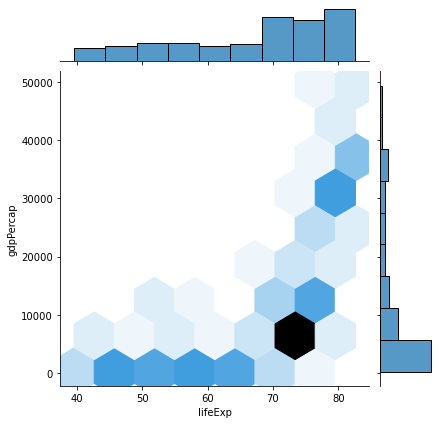

In [20]:
sns.jointplot(df.lifeExp, df.gdpPercap, kind="hex")

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


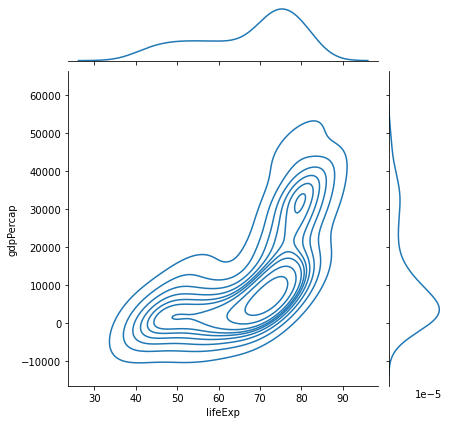

In [21]:
sns.jointplot(df.lifeExp, df.gdpPercap, kind="kde")

### Wykresy liniowe

In [22]:
url_covid="https://covid19.who.int/WHO-COVID-19-global-data.csv"
df = pd.read_csv(url_covid)
df.sample(n=10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
110269,2020-04-21,PG,Papua New Guinea,WPRO,0,7,0,0
91547,2021-03-05,MX,Mexico,AMRO,6533,2161169,498,212621
93691,2021-06-17,MN,Mongolia,WPRO,2642,85770,9,389
101866,2021-07-02,NI,Nicaragua,AMRO,0,6604,0,191
25378,2020-08-08,CA,Canada,AMRO,374,118561,4,8966
152285,2021-10-09,UA,Ukraine,EURO,15908,2529913,250,58331
67445,2020-05-07,IQ,Iraq,EMRO,49,2480,0,102
100035,2020-03-18,NC,New Caledonia,WPRO,0,0,0,0
5042,2020-10-11,AG,Antigua and Barbuda,AMRO,0,111,0,3
36785,2020-03-08,KP,Democratic People's Republic of Korea,SEARO,0,0,0,0


In [25]:
df.Date_reported = pd.to_datetime(df.Date_reported, format="%Y-%m-%d")

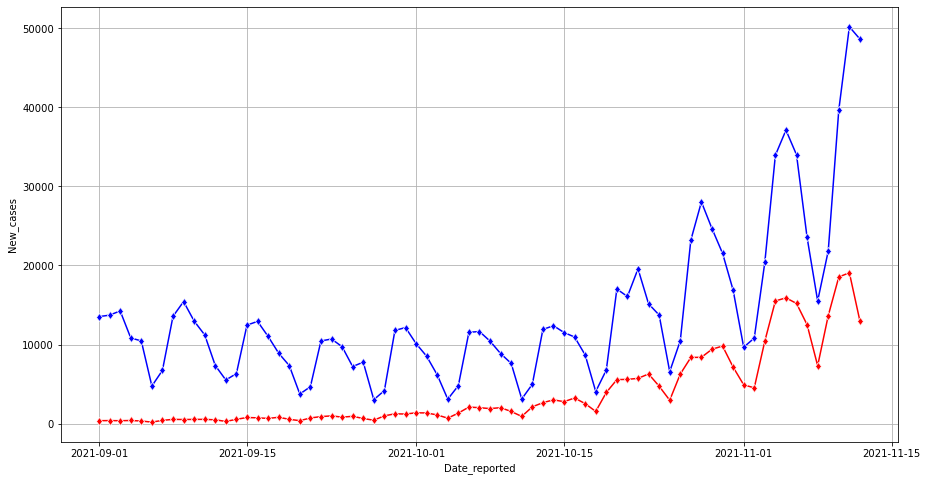

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.query(" Country_code=='PL' and Date_reported>='2021-09-01' "),              
             x="Date_reported", y="New_cases", color="red", marker="d"  )

sns.lineplot(data=df.query(" Country_code=='DE' and Date_reported>='2021-09-01' "), 
             x="Date_reported", y="New_cases", color="blue", marker="d"  )

plt.grid()
plt.show()

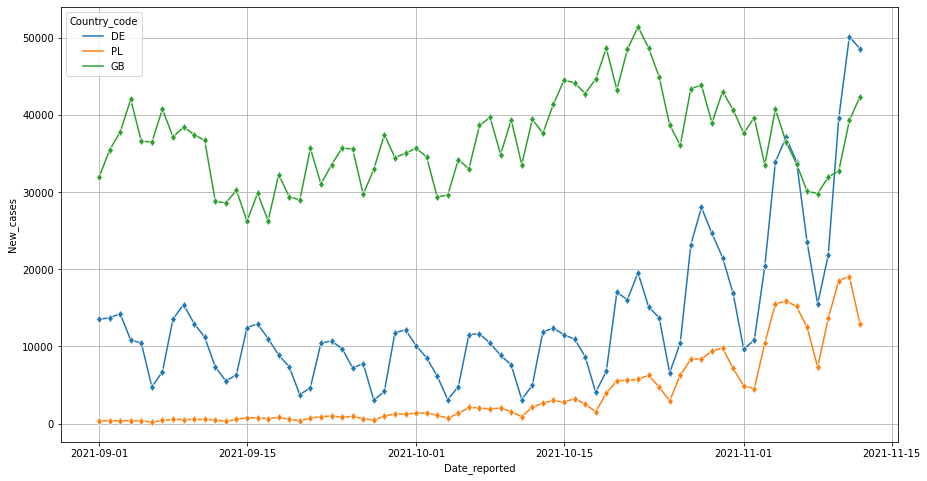

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.query(" Country_code in ['PL','DE','GB'] and Date_reported>='2021-09-01' "),              
             x="Date_reported", y="New_cases",  marker="d", hue="Country_code"  )

plt.grid()
plt.show()

Znajdź TOP9 krajów europejskich z największą sumaryczną liczbą zakażonych od 2021-06-01 i pokaż dla każdego z nich statystykę

In [39]:
df.WHO_region.unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other'],
      dtype=object)

In [40]:
df1 = df.query(" Date_reported>='2021-06-01' and WHO_region=='EURO'  ")

In [41]:
df1.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,10230.000000,1.023000e+04,10230.000000,10230.000000
mean,2539.144282,1.039610e+06,31.422483,20561.071261
std,6305.972783,1.784156e+06,116.340372,37756.628188
min,0.000000,0.000000e+00,-41.000000,0.000000
25%,33.000000,7.431875e+04,0.000000,494.500000
50%,381.000000,2.855990e+05,2.000000,5026.000000
75%,1733.750000,9.842055e+05,15.000000,17622.750000
max,53969.000000,9.448406e+06,1239.000000,252926.000000


In [51]:
countries = list(df1.groupby("Country")["New_cases"].sum().sort_values(ascending=False).head(12).index)
countries

['The United Kingdom',
 'Russian Federation',
 'Turkey',
 'France',
 'Spain',
 'Germany',
 'Ukraine',
 'Romania',
 'Italy',
 'Netherlands',
 'Kazakhstan',
 'Israel']

In [58]:
df.query(f"  Date_reported>='2021-06-01' and Country=='The United Kingdom' ").\
    set_index('Date_reported')["New_cases"].resample('14D').mean()

Date_reported
2021-06-01     5839.785714
2021-06-15    11901.500000
2021-06-29    27772.214286
2021-07-13    41190.500000
2021-07-27    26532.142857
2021-08-10    30253.142857
2021-08-24    34658.571429
2021-09-07    32258.571429
2021-09-21    33638.142857
2021-10-05    39177.500000
2021-10-19    43461.714286
2021-11-02    35524.818182
Freq: 14D, Name: New_cases, dtype: float64

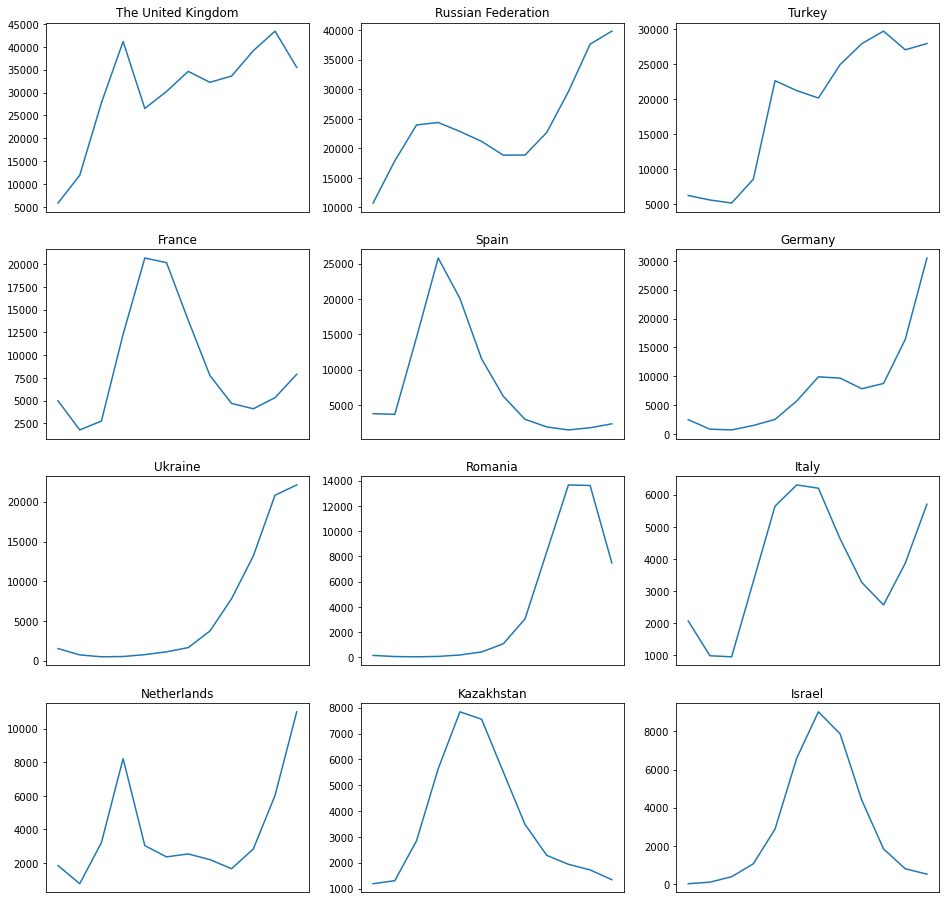

In [60]:
plt.subplots(4, 3, figsize=(16,16) )
for index,c in enumerate(countries,1):
    #df_tmp = df.query(f"  Date_reported>='2021-06-01' and Country=='{c}' ")
    df_tmp = df.query(f"  Date_reported>='2021-06-01' and Country=='{c}' ").\
            set_index('Date_reported')["New_cases"].resample('14D').mean()
    plt.subplot(4, 3, index)
    plt.plot(df_tmp.index, df_tmp.values)
    plt.title(c)
    plt.xticks([])

In [67]:
txt = "AlaMaKota"
counter=1
for counter,character in enumerate(txt,100):
    print(counter,character)


100 A
101 l
102 a
103 M
104 a
105 K
106 o
107 t
108 a
